In [1]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import itertools
import plotly.io as pio
from plotly.subplots import make_subplots

pio.templates.default = "simple_white"

OPACITY = 0.3

In [2]:
d = 10
n = int(1.5*d)
a = 3
zero_cols = np.random.choice(list(range(n)), d - a, replace = False)
zeros = []

IMG_LEN=500

for x in range(n):
    if x in zero_cols:
        ys = range(n)
    else: 
        ys = np.random.choice(list(range(n)), a, replace = False)
    for y in ys:
        zeros.append((x, y))
        
def get_trace(zeros, color, opacity, size):
    xs, ys = zip(*zeros)
    return go.Scatter(
        x=xs, y=ys, mode="markers"
        , marker=dict(
            color=color
            , opacity=opacity
            , symbol="square"
            , size=size
        )
    )

def set_layout(fig):
    fig.update_layout(height=IMG_LEN, width=IMG_LEN, showlegend=False)
    fig.update_yaxes(visible=False)
    fig.update_xaxes(visible=False)

In [3]:
# fig = go.Figure()
# fig.update_layout(height=IMG_LEN, width=IMG_LEN)
fig = go.Figure()
fig.add_trace(get_trace(zeros, 'black', 1, IMG_LEN/n/2))
set_layout(fig)
fig.write_image("zero-pattern.png", scale=3)

In [4]:
T = []
for x in range(n):
    for y in range(n):
        if x + y < 3/2*d:
            T.append((x, y))
            
def shifty(Z):
    new_Z = []
    for x in range(n):
        num_in = sum(
            (x, i) in Z for i in range(n)
        )
        for y in range(num_in):
            new_Z.append((x,y))
    return new_Z

def shiftx(Z):
    new_Z = []
    for y in range(n):
        num_in = sum(
            (i, y) in Z for i in range(n)
        )
        for x in range(num_in):
            new_Z.append((x,y))
    return new_Z


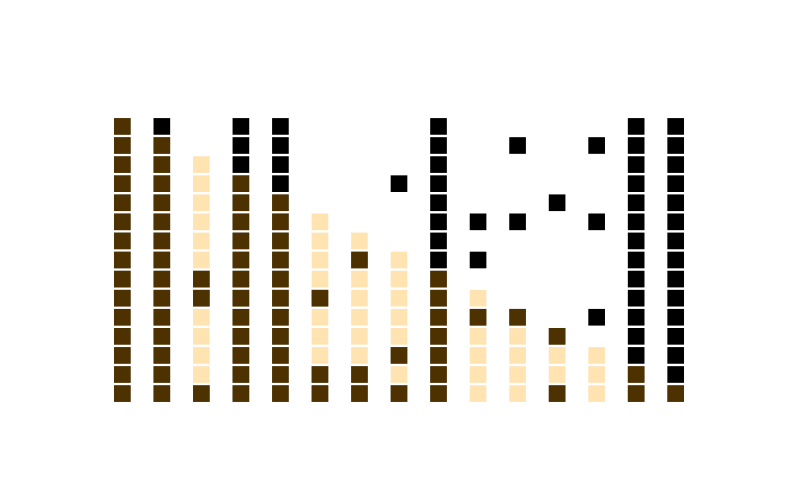

In [5]:
fig = go.Figure()
fig.add_trace(get_trace(zeros, 'black', 1, IMG_LEN/n/2))
fig.add_trace(get_trace(T, 'orange', OPACITY, IMG_LEN/n/2))
set_layout(fig)
fig.write_image("triangle_example.png", scale=3)
fig

# Shifting

In [6]:
fig = make_subplots(
    rows=1
    , cols=3
    , subplot_titles=(
        ""
        , r"$\LARGE{\text{After shifting in the } y \text{ direction}}$"
        , r"$\LARGE{\text{After shifting in the } x \text{ direction}}$"
    )
    , horizontal_spacing=0.02
)

fig.add_trace(
    get_trace(zeros, 'black', 1, size=IMG_LEN/n/2),
    row=1,
    col=1,
)
fig.add_trace(
    get_trace(T, 'orange', OPACITY, size=IMG_LEN/n/2),
    row=1,
    col=1,
)

shifted = shifty(zeros)
fig.add_trace(
    get_trace(shifted, 'black', 1, size=IMG_LEN/n/2),
    row=1,
    col=2,
)
fig.add_trace(
    get_trace(T, 'orange', OPACITY, size=IMG_LEN/n/2),
    row=1,
    col=2,
)
shifted2 = shiftx(shifted)
fig.add_trace(
    get_trace(shifted2, 'black', 1, size=IMG_LEN/n/2),
    row=1,
    col=3,
)
fig.add_trace(
    get_trace(T, 'orange', OPACITY, size=IMG_LEN/n/2),
    row=1,
    col=3,
)
fig.update_layout(height=IMG_LEN, width=2.7*IMG_LEN, showlegend=False)
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)


In [7]:

fig.write_image("shifting_example.png", scale=3)
fig

In [8]:
# fig = go.Figure()
# fig.add_trace(
#     get_trace(shifted2, 'black', 1, size=IMG_LEN/n/2),
# )
# fig.add_trace(
#     get_trace(T, 'orange', OPACITY, size=IMG_LEN/n/2),
# )
# fig.update_layout(height=IMG_LEN, width=IMG_LEN, showlegend=False)
# fig.update_yaxes(visible=False)
# fig.update_xaxes(visible=False)